In [1]:
import string 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read all the text.
f=open('rus.txt','rt',encoding='utf-8')
allsents=f.read()
f.close()
#Seperate the sents and form language pair.
sents=allsents.strip().split('\n')
pair=[pr.split('\t') for pr in sents]
pair=np.array(pair)


In [3]:
#Making a dataframe so to drop third column from array.
tempdf=pd.DataFrame(pair)

In [4]:
tempdf.head()

,0,1,2
0,Go.,Марш!,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Иди.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Go.,Идите.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,Hi.,Здравствуйте.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Hi.,Привет!,CC-BY 2.0 (France) Attribution: tatoeba.org #5...


In [5]:
lang_pairs=tempdf.iloc[:,:2].values

In [6]:
lang_pairs

array([['Go.', 'Марш!'],
       ['Go.', 'Иди.'],
       ['Go.', 'Идите.'],
       ...,
       ['At a moment when our economy is growing, our businesses are creating jobs at the fastest pace since the 1990s, and wages are starting to rise again, we have to make some choices about the kind of country we want to be.',
        'В тот момент, когда наша экономика растёт, наши предприятия создают рабочие места наибольшими темпами, начиная с 90-х годов, а зарплаты снова начинают расти, мы должны принять ряд решений относительно того, какой страной мы хотим быть.'],
       ['Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.',
        'Поскольку сайтов, посвящённых какой-либо теме, как правило, несколько, я обычно просто нажимаю на кнопку "назад", если попадаю на страницу со всплывающей рекламой. Я просто пе

In [7]:
#Removing punctuation.
lang_pairs[:,0] = [(s.translate(str.maketrans('', '', string.punctuation))).lower() for s in lang_pairs[:,0]]
lang_pairs[:,1] = [(s.translate(str.maketrans('', '', string.punctuation))).lower() for s in lang_pairs[:,1]]

In [9]:
#Taking lakh samples so that we get only smaller sentences cause we are not using attention in our model.
lang_pairs=lang_pairs[:100000,:]

In [10]:
lang_pairs

array([['go', 'марш'],
       ['go', 'иди'],
       ['go', 'идите'],
       ...,
       ['do you want me to stop', 'ты хочешь чтобы я остановился'],
       ['do you want me to stop', 'ты хочешь чтобы я остановилась'],
       ['do you want me to stop', 'вы хотите чтобы я остановился']],
      dtype=object)

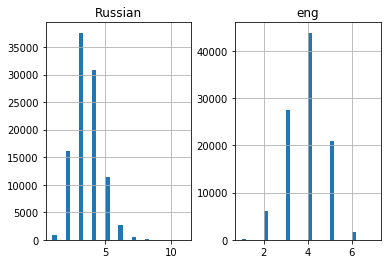

In [11]:
#Visualising the sentences length
eng_len = []
rus_len = []


for i in lang_pairs[:,0]:
      eng_len.append(len(i.split()))

for i in lang_pairs[:,1]:
      rus_len.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_len, 'Russian':rus_len})

length_df.hist(bins = 30)
plt.show()

# From EDA We observe the english has sentences has maximum length around 8